### Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [71]:
# Create 3 layers
layer1 = layers.Dense(2, activation="relu", name="layer1")  # Dense means fully connected neural network
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")

# Call layers on a test input
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [72]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

In [73]:
x=tf.ones((1,4))  # 4 is features
print(x.numpy())
y=model(x)
print(len(model.weights))
print(model.summary())

[[1. 1. 1. 1.]]
6
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             multiple                  10        
_________________________________________________________________
dense_11 (Dense)             multiple                  9         
_________________________________________________________________
dense_12 (Dense)             multiple                  16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________
None


## Cat and Dog classifier using CNN

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D



In [75]:
classifier=Sequential()  #initialising the model 

In [76]:
classifier.add(Conv2D(16, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))  # a filter of 3X3 and 16 kernals

In [77]:
classifier.add(MaxPooling2D(pool_size = (2, 2))) # Poolwindow size is 2X2

In [78]:
# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


In [79]:
classifier.add(Flatten())  # converting to 1D data

In [80]:
# Step 4 - Full connection making neural network layers
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid')) # No. of neurons=No. of output classes

In [81]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)



In [83]:
# Labels the data automatically

training_set = train_datagen.flow_from_directory('E:\\Download\\dataset_catdog\\dataset_catdog\\training_set',
                                                 target_size = (64, 64),batch_size = 32,class_mode ='binary')

test_set = test_datagen.flow_from_directory('E:\\Download\\dataset_catdog\\dataset_catdog\\test_set',
                                            target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [68]:
# Training the model (It will take time)

classifier.fit_generator(training_set,

                         steps_per_epoch = 8000,

                         epochs = 2 , 

                        validation_data = test_set,

                        validation_steps = 2000)

#Saving trained model

classifier.save('my_model_catdog.h5')

Epoch 1/2
8000/8000 [==============================] - 16692s 2s/step - loss: 0.1434 - accuracy: 0.9326 - val_loss: 1.6899 - val_accuracy: 0.7479
Epoch 2/2
8000/8000 [==============================] - 2464s 308ms/step - loss: 6.2335e-05 - accuracy: 1.0000 - val_loss: 2.1759 - val_accuracy: 0.7493


In [87]:
#Saving the model

from tensorflow.keras.models import load_model

classifier=load_model('my_model_catdog.h5')

# Making of model is completed

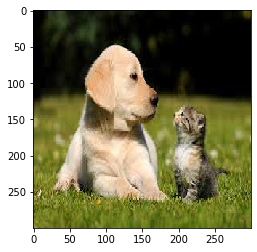

In [92]:
# Part 3 - Making new predictions

import numpy as np

from tensorflow.keras.preprocessing import image

test_image = image.load_img('E:\\Download\\dataset_catdog\\dataset_catdog\\single_prediction\\cat_and_dog.jpg',target_size = (300, 300)) 

import matplotlib.pyplot as plt

from matplotlib.pyplot import imshow

%matplotlib inline

plt.imshow(test_image)

In [93]:
#Cat and dog classification

import numpy as np

from tensorflow.keras.preprocessing import image

test_image = image.load_img('E:\\Download\\dataset_catdog\\dataset_catdog\\single_prediction\\cat_and_dog.jpg', target_size = (64, 64))

test_image = image.img_to_array(test_image)

test_image = np.expand_dims(test_image, axis = 0)

result = classifier.predict(test_image)

training_set.class_indices

if result[0][0] == 1:

    prediction = 'dog'

else:

    prediction = 'cat'

prediction

'dog'